<a href="https://colab.research.google.com/github/Kienknu/Kienknu/blob/main/Kien_SOA_Mechanism_0320.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 46.3 MB/s eta 0:00:00


In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display

#01.


In [21]:
chemical_space_1 = {'Cc1ccccc1'}  # Toluene

reacting_species = {'[OH]', '[N](=O)', '[N+](=O)[O-]'}
num_iterations = 3

reaction_rules = [
    AllChem.ReactionFromSmarts('[cH:1]>>[c:1][c*]'),  # radical formation
    AllChem.ReactionFromSmarts('[c:1]>>[c:1][OH]'),
    AllChem.ReactionFromSmarts('[c:1]>>[c:1][N+](=O)[O-]'),
    AllChem.ReactionFromSmarts('[c:1]>>[c:1][N](=O)'),

]

def create_aromatic_radical(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)

    radical = Chem.MolFromSmarts("[c*]")

    if mol.HasSubstructMatch(radical):
        for atom in mol.GetAtoms():
            if atom.GetIsAromatic() and atom.GetNumExplicitHs() > 0:
                atom.SetNumExplicitHs(atom.GetNumExplicitHs() - 1)
                atom.SetNumRadicalElectrons(1)
                break

    # Prevent Kekulé errors
    Chem.SanitizeMol(mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_KEKULIZE)
    return Chem.MolToSmiles(mol)

# Reaction
for _ in range(num_iterations):
    temp_new_products = set()

    for reactant_smiles in chemical_space_1.copy():
        reactant_mol = Chem.MolFromSmiles(reactant_smiles)

        if reactant_mol:
            for rxn in reaction_rules:
                possible_products = rxn.RunReactants((reactant_mol,))

                for prod_set in possible_products:
                    for prod in prod_set:
                        try:
                            prod_smiles = Chem.MolToSmiles(prod)

                            # radical correction
                            if "[c*]" in prod_smiles:
                                prod_smiles = create_aromatic_radical(reactant_smiles)

                            if prod_smiles not in chemical_space_1:
                                temp_new_products.add(prod_smiles)
                        except:
                            pass

    chemical_space_1.update(temp_new_products)


print("Generated Chemical Space:")
for chem in chemical_space_1:
    print(chem)

Generated Chemical Space:
Cc1cc([N+](=O)[O-])cc(O)c1O
Cc1(O)cccc(O)c1[N+](=O)[O-]
Cc1(N=O)ccc([N+](=O)[O-])c([N+](=O)[O-])c1
Cc1ccc(O)([N+](=O)[O-])c(N=O)c1
Cc1(N=O)cccc(N=O)c1N=O
Cc1(O)c(O)cccc1O
Cc1cc(N=O)cc(N=O)([N+](=O)[O-])c1
Cc1ccc([N+](=O)[O-])([N+](=O)[O-])cc1N=O
Cc1ccc(N=O)([N+](=O)[O-])cc1[N+](=O)[O-]
Cc1([N+](=O)[O-])cccc(O)c1[N+](=O)[O-]
cc1cc([N+](=O)[O-])c(C)cc1[N+](=O)[O-]
Cc1cc([N+](=O)[O-])cc(N=O)c1[N+](=O)[O-]
Cc1cc([N+](=O)[O-])c([N+](=O)[O-])cc1N=O
Cc1(N=O)ccccc1
Cc1ccccc1(O)O
cc1c(O)cc(C)cc1N=O
Cc1([N+](=O)[O-])cc(N=O)ccc1N=O
Cc1c([N+](=O)[O-])ccc([N+](=O)[O-])c1N=O
cc1ccc(C)c(O)c1[N+](=O)[O-]
Cc1c(N=O)cccc1N=O
Cc1ccc(N=O)c(N=O)c1N=O
Cc1(N=O)c(O)cccc1N=O
Cc1ccc([N+](=O)[O-])c([N+](=O)[O-])c1N=O
cc1ccc([N+](=O)[O-])cc1C
Cc1(O)ccc([N+](=O)[O-])c(O)c1
cc1cccc(N=O)c1C
cc1cc(O)c(C)c([N+](=O)[O-])c1
Cc1ccc([N+](=O)[O-])c(O)c1[N+](=O)[O-]
Cc1cc(O)ccc1(N=O)[N+](=O)[O-]
Cc1cc(N=O)ccc1(O)N=O
Cc1cccc(O)c1(N=O)[N+](=O)[O-]
Cc1ccc(N=O)(N=O)c(O)c1
Cc1ccccc1(N=O)N=O
Cc1ccc(O)c(O)

[00:45:01] non-ring atom 0 marked aromatic
[00:45:01] non-ring atom 0 marked aromatic
[00:45:01] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[00:45:01] non-ring atom 0 marked aromatic
[00:45:01] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[00:45:01] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[00:45:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 12
[00:45:01] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 10
[00:45:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 9 10
[00:45:01] non-ring atom 0 marked aromatic
[00:45:01] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:45:01] non-ring atom 0 marked aromatic
[00:45:01] non-ring atom 0 marked aromatic
[00:45:01] non-ring atom 0 marked aromatic
[00:45:01] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[00:45:01] non-ring atom 0 marked aromatic
[00:45:01] non-ring atom 0 marked aromatic
[00:45:01] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 9
[00:45:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5


[00:45:07] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 4 5 6 10 14
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 1 2 3 9 12
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 10
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 1 2 3 6 13
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 1 2 3 11 12
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 1 2 3 10 11
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 10
[00:45:07] non-ring atom 0 marked aromatic
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[00:45:07] non-ring atom 0 marked aromatic
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 5 6 9 10 11
[00:45:07] non-ring atom 0 marked aromatic
[00:45:07] Can't kekulize mol.  Unkekulized atoms: 4 6 7 8 9
[00:45:07] non-ring atom 0 marked aromatic
[00:45:07] Can't kekuli

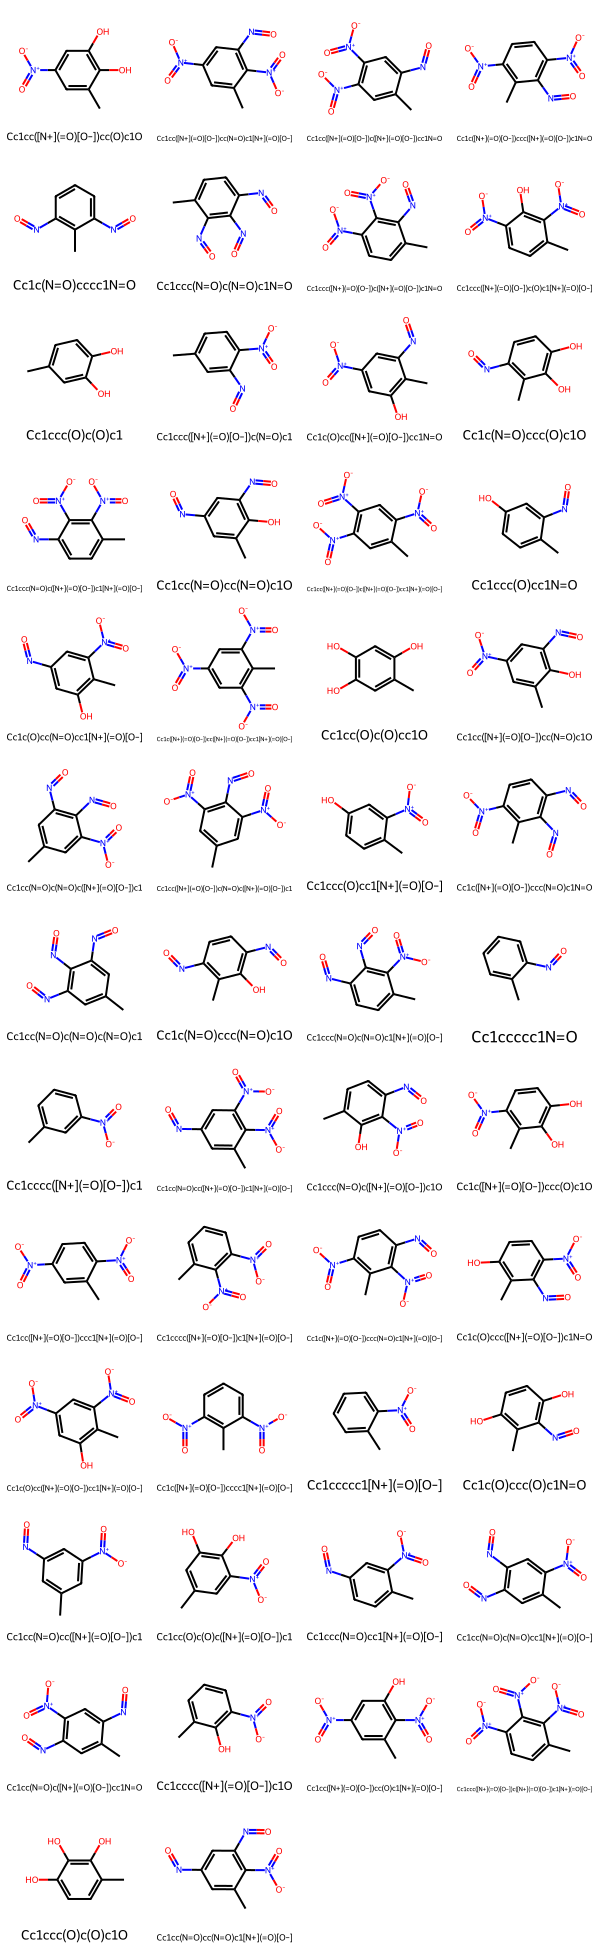

In [22]:
# Create Mol objects
smiles_list_1 = list(chemical_space_1)

mols = []

for smi in smiles_list_1:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])

#02.

In [23]:
chemical_space_1 = {'Cc1ccccc1'}  # Toluene

reacting_species = {'[OH]', '[N+](=O)[O-]', '[N][O]'}
num_iterations = 3

reaction_rules = [
    AllChem.ReactionFromSmarts('[cH:1]>>[c:1][*]'),  # radical formation
    AllChem.ReactionFromSmarts('[c:1]>>[c:1][OH]'),
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1][OH]([N+](=O)[O-])'),
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1][OH]([N][O])'),

]

def create_aromatic_radical(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)

    radical = Chem.MolFromSmarts("[c*]")

    if mol.HasSubstructMatch(radical):
        for atom in mol.GetAtoms():
            if atom.GetIsAromatic() and atom.GetNumExplicitHs() > 0:
                atom.SetNumExplicitHs(atom.GetNumExplicitHs() - 1)
                atom.SetNumRadicalElectrons(1)
                break

    # Prevent Kekulé errors
    Chem.SanitizeMol(mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_KEKULIZE)
    return Chem.MolToSmiles(mol)

# Reaction
for _ in range(num_iterations):
    temp_new_products = set()

    for reactant_smiles in chemical_space_1.copy():
        reactant_mol = Chem.MolFromSmiles(reactant_smiles)

        if reactant_mol:
            for rxn in reaction_rules:
                possible_products = rxn.RunReactants((reactant_mol,))

                for prod_set in possible_products:
                    for prod in prod_set:
                        try:
                            prod_smiles = Chem.MolToSmiles(prod)

                            # radical correction
                            if "[c*]" in prod_smiles:
                                prod_smiles = create_aromatic_radical(reactant_smiles)

                            if prod_smiles not in chemical_space_1:
                                temp_new_products.add(prod_smiles)
                        except:
                            pass

    chemical_space_1.update(temp_new_products)


print("Generated Chemical Space:")
for chem in chemical_space_1:
    print(chem)

Generated Chemical Space:
*c1cc(O)cc(C)c1*
Cc1ccc([OH]NO)c(O)c1
Cc1c(O)cccc1[OH][N+](=O)[O-]
*c1c(O)cc(C)cc1O
Cc1cccc(O)(O)c1O
*c1cc(C)(O)ccc1O
*c1cccc(C)c1
*c1cc(C)cc(O)c1
Cc1(O)c(O)cccc1O
*c1cc(C)c(O)cc1*
Cc1ccc(O)c(O)(O)c1
Cc1(O)cccc(O)c1
*c1cc(C)cc(O)(O)c1
Cc1cccc([OH][N+](=O)[O-])c1O
*c1(O)cccc(C)c1
*c1ccc(O)(O)cc1C
*c1cccc(C)c1(*)O
*c1ccc(O)c(*)c1C
*c1ccc(C)c(*)c1O
*c1ccc(O)c(O)c1C
*c1ccc(C)cc1(*)O
*c1cc(C)cc(O)c1O
Cc1ccc(O)c(O)c1O
*c1ccc([OH][N+](=O)[O-])cc1C
*c1ccc(C)cc1(O)O
Cc1ccccc1(O)O
*c1cccc(*)(O)c1C
*c1cc(O)(O)ccc1C
*c1cc(*)c(C)c(O)c1
Cc1ccc([OH][N+](=O)[O-])cc1
*c1c(C)cccc1[OH][N+](=O)[O-]
*c1cc(O)c(C)cc1O
*c1cccc(C)(O)c1*
Cc1cc(O)cc([OH][N+](=O)[O-])c1
*c1ccc(*)(O)cc1C
Cc1cc(O)cc([OH]NO)c1
Cc1cc(O)ccc1[OH]NO
*c1ccc(C)c([OH][N+](=O)[O-])c1
Cc1ccc(O)(O)cc1
*c1cccc(O)(O)c1C
*c1cc(C)cc(*)c1*
*c1c(C)cc(O)cc1O
*c1ccc(C)c(*)c1
Cc1(O)cc(O)cc(O)c1
*c1ccc(O)cc1(C)O
Cc1cccc(O)c1[OH][N+](=O)[O-]
*c1ccc(*)c(C)(O)c1
*c1c(C)ccc(O)c1O
*c1cccc(C)(O)c1
*c1cccc([OH][N+](=O)[O-])c1C
Cc1ccc

[00:46:02] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[00:46:02] Explicit valence for atom # 6 O, 3, is greater than permitted
[00:46:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[00:46:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[00:46:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[00:46:02] Explicit valence for atom # 6 O, 3, is greater than permitted
[00:46:02] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:46:02] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:46:02] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8
[00:46:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[00:46:02] Explicit valence for atom # 5 O, 3, is greater than permitted
[00:46:02] Explicit valence for atom # 5 O, 3, is greater than permitted
[00:46:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
[00:46:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
[00:46:02] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8
[00:46:02] Explicit valence for atom 

[00:46:20] Explicit valence for atom # 5 O, 3, is greater than permitted
[00:46:20] Explicit valence for atom # 8 O, 3, is greater than permitted
[00:46:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[00:46:20] Can't kekulize mol.  Unkekulized atoms: 1 2 6 7 8
[00:46:20] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8
[00:46:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 9
[00:46:20] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:46:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 9
[00:46:20] Explicit valence for atom # 6 O, 3, is greater than permitted
[00:46:20] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:46:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
[00:46:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[00:46:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6
[00:46:20] Explicit valence for atom # 5 O, 3, is greater than permitted
[00:46:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6
[00:46:20] Can't kekulize mol.  Unkek

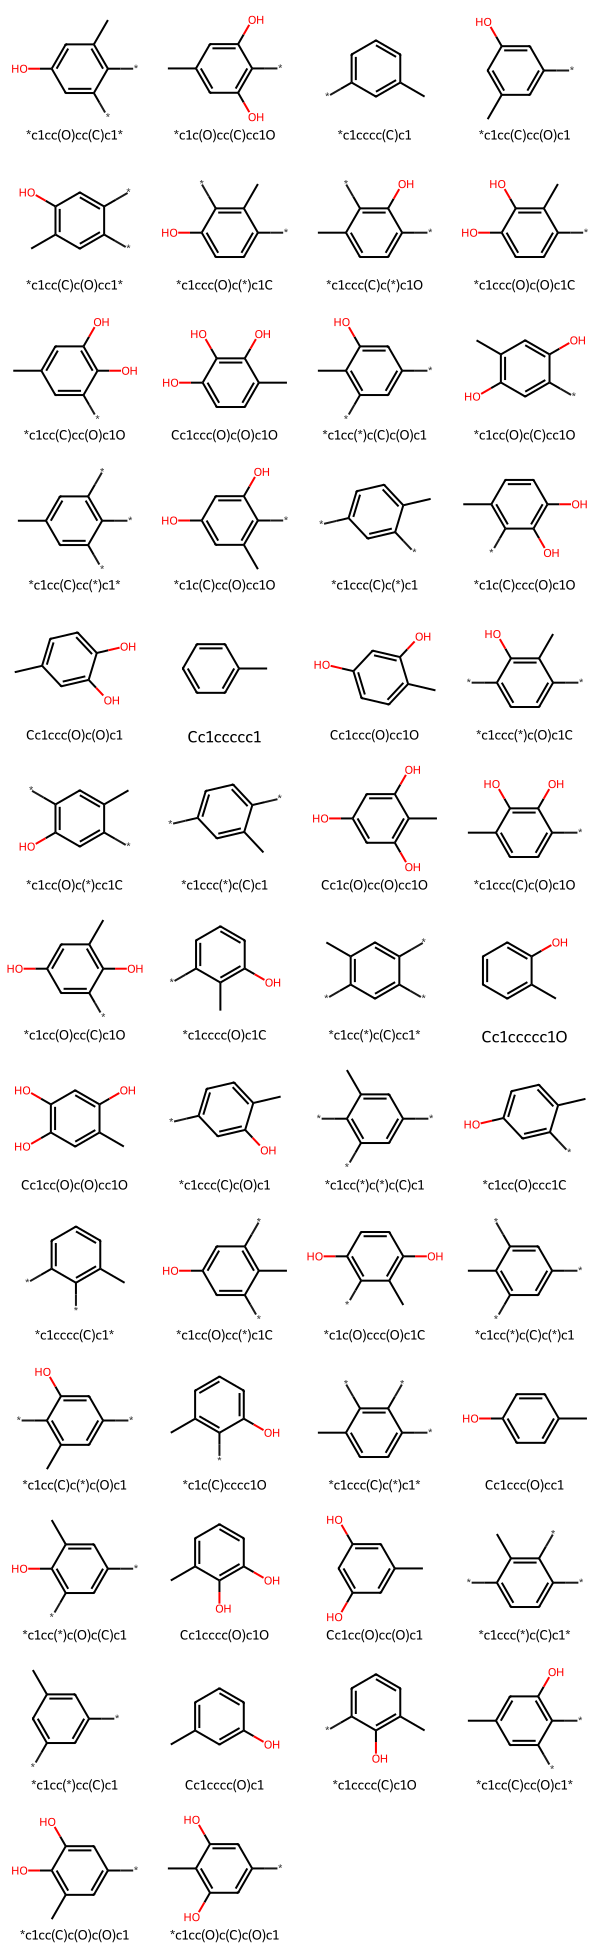

In [24]:
# Create Mol objects
smiles_list_1 = list(chemical_space_1)

mols = []

for smi in smiles_list_1:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])

#03.

In [25]:
chemical_space_1 = {'Cc1ccccc1'}  # Toluene

reacting_species = {'[OH]', '[N+](=O)[O-]', '[NO]'}
num_iterations = 3

reaction_rules = [
    AllChem.ReactionFromSmarts('[c:1]>>[c:1][c*]'),  # radical formation
    AllChem.ReactionFromSmarts('[c:1]>>[c:1][OH]'),
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1][OH][N+](=O)[O-]'),
    AllChem.ReactionFromSmarts('[c:1][*]>>[c:1][NO]'),
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1][NO]')
]

def create_aromatic_radical(smiles):

    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)

    radical = Chem.MolFromSmarts("[c*]")

    if mol.HasSubstructMatch(radical):
        for atom in mol.GetAtoms():
            if atom.GetIsAromatic() and atom.GetNumExplicitHs() > 0:
                atom.SetNumExplicitHs(atom.GetNumExplicitHs() - 1)
                atom.SetNumRadicalElectrons(1)
                break

    Chem.SanitizeMol(mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_KEKULIZE)
    return Chem.MolToSmiles(mol)

# Reaction
for _ in range(num_iterations):
    temp_new_products = set()

    for reactant_smiles in chemical_space_1.copy():
        reactant_mol = Chem.MolFromSmiles(reactant_smiles)

        if reactant_mol:
            for rxn in reaction_rules:
                possible_products = rxn.RunReactants((reactant_mol,))

                for prod_set in possible_products:
                    for prod in prod_set:
                        try:
                            prod_smiles = Chem.MolToSmiles(prod)

                            # radicals propagate
                            if "[c*]" in prod_smiles:
                                prod_smiles = create_aromatic_radical(reactant_smiles)

                            if prod_smiles not in chemical_space_1:
                                temp_new_products.add(prod_smiles)
                        except:
                            pass

    chemical_space_1.update(temp_new_products)


print("Generated Chemical Space :")
for chem in chemical_space_1:
    print(chem)

Generated Chemical Space :
Ncccc(O)cO
ccc(C)c(N)cN
Cccc(O)cc(N)O
Nc1(O)ccccc1O
Cc1(O)c(O)cccc1O
cc(N)c(C)ccN
cc1ccc(C)cc1N
cc1(N)ccccc1O
Cc(cN)cc(O)cO
Cc1(O)cccc(O)c1
Nc1cccc(O)(O)c1
Nc1cccc([OH][N+](=O)[O-])c1
cc1(C)cccc(O)c1
cc1cccc(C)c1
Cc(N)ccccO
cc1(C)ccc(O)cc1
Nc1ccc([OH][N+](=O)[O-])cc1
cc1cc(C)ccc1O
cc1ccc(N)cc1C
Cc1ccccc1(O)O
cc(C)cc(N)cN
cc(O)ccc(N)N
Cc1ccc([OH][N+](=O)[O-])cc1
cc(O)cc(C)cN
Cc1cc(O)cc([OH][N+](=O)[O-])c1
cc1(N)ccccc1C
Cc1c(N)cccc1O
Cc1cccc(N)(O)c1
cc(O)c(O)ccN
ccc(N)cc(N)O
Cc1cc(N)ccc1O
ccc(N)ccN
cc(O)c(N)ccN
Cc1cccc(O)c1[OH][N+](=O)[O-]
ccc(O)cc(N)O
Cc(cN)c(O)ccO
Cc1ccc(O)c(O)c1
cc(C)c(O)ccN
Cc(cO)ccc(N)O
cc1cccc(O)c1N
cc1(C)cccc(O)c1O
cc1(O)ccc(C)cc1
cccc(C)c(N)N
Cc1(O)ccc(N)cc1
cc1cc(O)c(O)cc1C
cc1(N)ccccc1
cc1cc(N)cc(O)c1
Cc1(O)ccccc1N
CcccccN
Cc1ccc(O)cc1O
ccc(C)ccN
Cc1cccc(O)c1N
ccc(C)c(O)cN
cc1cc(C)cc(N)c1
cc1(O)cc(C)ccc1O
Cc(cN)cccN
Cc1ccccc1N
cc1c(N)cccc1O
cc(O)ccc(C)N
Cc1ccc(O)cc1(O)O
cc1cc(N)ccc1C
cc1c(C)cccc1O
Cc1ccc(N)(O)cc1
cc1(N)cccc(C)c1
Cc1cc

[00:46:47] non-ring atom 0 marked aromatic
[00:46:47] non-ring atom 0 marked aromatic
[00:46:47] non-ring atom 0 marked aromatic
[00:46:47] non-ring atom 0 marked aromatic
[00:46:47] non-ring atom 0 marked aromatic
[00:46:47] non-ring atom 1 marked aromatic
[00:46:47] non-ring atom 0 marked aromatic
[00:46:47] non-ring atom 0 marked aromatic
[00:46:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[00:46:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[00:46:47] non-ring atom 0 marked aromatic
[00:46:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[00:46:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[00:46:47] Explicit valence for atom # 6 O, 3, is greater than permitted
[00:46:47] non-ring atom 0 marked aromatic
[00:46:47] non-ring atom 0 marked aromatic
[00:46:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:46:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:46:47] non-ring atom 0 marked aromatic
[00:46:47] non-ring atom 0 marked aromatic
[0

[00:46:54] non-ring atom 1 marked aromatic
[00:46:54] non-ring atom 0 marked aromatic
[00:46:54] non-ring atom 1 marked aromatic
[00:46:54] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[00:46:54] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8
[00:46:54] non-ring atom 0 marked aromatic
[00:46:54] non-ring atom 0 marked aromatic
[00:46:54] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[00:46:54] non-ring atom 1 marked aromatic
[00:46:54] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:46:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[00:46:54] Explicit valence for atom # 6 O, 3, is greater than permitted
[00:46:54] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:46:54] non-ring atom 0 marked aromatic
[00:46:54] non-ring atom 1 marked aromatic
[00:46:54] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8
[00:46:54] Explicit valence for atom # 5 O, 3, is greater than permitted
[00:46:54] non-ring atom 0 marked aromatic
[00:46:54] non-ring atom 0 marked aromat

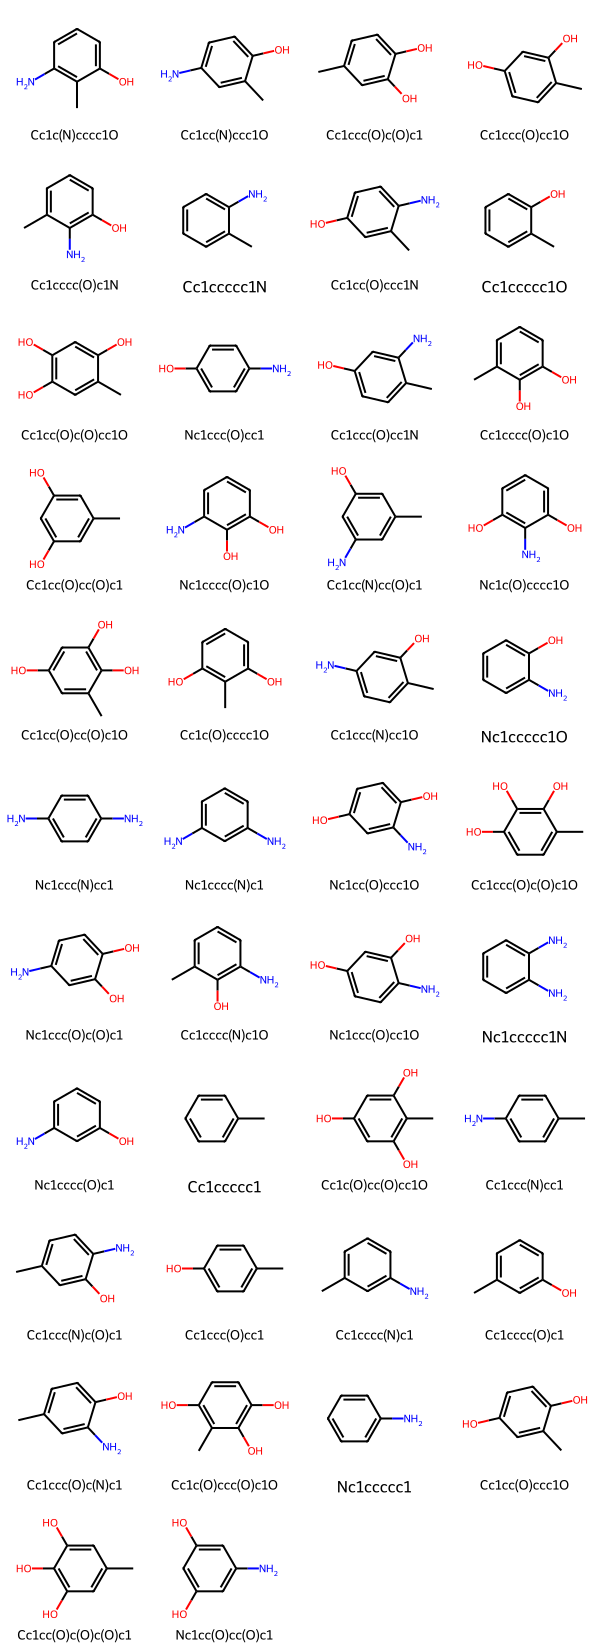

In [26]:
# Create Mol objects
smiles_list_1 = list(chemical_space_1)

mols = []

for smi in smiles_list_1:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])

#04.

In [9]:
chemical_space_1 = {'Cc1ccccc1'}  # Toluene

reacting_species = {'[OH]', '[N+](=O)[O-]', '[NO]'}
num_iterations = 3

reaction_rules = [
    AllChem.ReactionFromSmarts('[cH:1]>>[c:1][*]'),  # Radical formation
    AllChem.ReactionFromSmarts('[c:1]>>[c:1][OH]'),
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1][N+](=O)[O-]'),
    AllChem.ReactionFromSmarts('[c:1][*]>>[c:1][N+](=O)'),

]

# Reaction
for _ in range(num_iterations):
    temp_new_products = set()

    for reactant_smiles in chemical_space_1.copy():
        reactant_mol = Chem.MolFromSmiles(reactant_smiles)

        if reactant_mol:
            for rxn in reaction_rules:
                possible_products = rxn.RunReactants((reactant_mol,))

                for prod_set in possible_products:
                    for prod in prod_set:
                        try:
                            prod_smiles = Chem.MolToSmiles(prod)

                            # radicals propagate
                            if "[c*]" in prod_smiles:
                                prod_smiles = prod_smiles.replace("[c*]", "[c]")

                            if prod_smiles not in chemical_space_1:
                                temp_new_products.add(prod_smiles)
                        except:
                            pass

    chemical_space_1.update(temp_new_products)


print("Generated Chemical Space:")
for chem in chemical_space_1:
    print(chem)

Generated Chemical Space:
ccc(O)cc[NH+]=O
*c1c(O)cc(C)cc1O
*c1cc(O)ccc1[NH+]=O
Cc1(O)c(O)cccc1O
*c1ccc(C)c([NH+]=O)c1
*c1cc(C)ccc1[N+](=O)[O-]
*c1(O)cccc(C)c1
O=[NH+]c1cccc(O)c1
*c1cccc(C)c1(*)O
*c1ccc(O)c(*)c1C
*c1ccc(O)c(O)c1C
*c1ccc(C)cc1(*)O
Ccc(ccc[NH+]=O)[N+](=O)[O-]
Cc1ccc([NH+]=O)c(O)c1
Cc1ccccc1(O)O
cc([NH+]=O)c(O)cc[NH+]=O
Cc1(O)ccc([NH+]=O)cc1
Cc(ccc(O)cO)[NH+]=O
*c1cccc([N+](=O)[O-])c1C
*c(c)cc(c[NH+]=O)[NH+]=O
Cc(c[NH+]=O)ccc[NH+]=O
*c([NH+]=O)c(*)ccc
*c1ccc(C)cc1[NH+]=O
cc(C)ccc(O)[NH+]=O
*c1cccc(C)(O)c1*
Cc1(O)cccc([NH+]=O)c1
*c(cc)c(O)c(C)[NH+]=O
O=[NH+]c1cccc(O)c1O
ccc(O)cc([NH+]=O)[NH+]=O
*c(cc[NH+]=O)c(c)C
*ccccc(C)[NH+]=O
*c(cc)c(*)c(C)[NH+]=O
*c1(O)ccc([NH+]=O)cc1
*cc(*)ccc[NH+]=O
*c(ccc(c)O)[NH+]=O
*c1ccc(*)c(C)(O)c1
Cc(cccc[N+](=O)[O-])[NH+]=O
*cc(O)cc(C)c[NH+]=O
Cc1ccc(O)c(O)c1
cc(C)c(cc[NH+]=O)[N+](=O)[O-]
cccc(c(C)[NH+]=O)[N+](=O)[O-]
*c1ccc(C)c(O)(O)c1
*c1cccc(O)c1[NH+]=O
Cccccc(O)[NH+]=O
Cc1cc(O)ccc1[NH+]=O
cc(O)cc(O)c(C)[NH+]=O
*c1ccc(*)c(C)c1
*c1ccc([NH+]=

[00:38:47] non-ring atom 0 marked aromatic
[00:38:47] non-ring atom 0 marked aromatic
[00:38:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[00:38:47] non-ring atom 1 marked aromatic
[00:38:47] non-ring atom 0 marked aromatic
[00:38:47] non-ring atom 0 marked aromatic
[00:38:47] non-ring atom 0 marked aromatic
[00:38:47] non-ring atom 0 marked aromatic
[00:38:47] non-ring atom 1 marked aromatic
[00:38:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[00:38:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[00:38:47] non-ring atom 0 marked aromatic
[00:38:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:38:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:38:47] non-ring atom 1 marked aromatic
[00:38:47] non-ring atom 0 marked aromatic
[00:38:47] non-ring atom 1 marked aromatic
[00:38:47] non-ring atom 0 marked aromatic
[00:38:47] non-ring atom 1 marked aromatic
[00:38:47] non-ring atom 0 marked aromatic
[00:38:47] non-ring atom 1 marked aromatic
[00:38:

[00:39:06] non-ring atom 0 marked aromatic
[00:39:06] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8
[00:39:06] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:39:06] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[00:39:06] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6
[00:39:06] non-ring atom 1 marked aromatic
[00:39:06] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[00:39:06] non-ring atom 0 marked aromatic
[00:39:06] Can't kekulize mol.  Unkekulized atoms: 3 4 5 8 9
[00:39:06] non-ring atom 1 marked aromatic
[00:39:06] non-ring atom 1 marked aromatic
[00:39:06] non-ring atom 1 marked aromatic
[00:39:06] non-ring atom 1 marked aromatic
[00:39:06] non-ring atom 0 marked aromatic
[00:39:06] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[00:39:06] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
[00:39:06] non-ring atom 1 marked aromatic
[00:39:06] non-ring atom 0 marked aromatic
[00:39:06] non-ring atom 1 marked aromatic
[00:39:06] non-ring atom 1 marked aroma

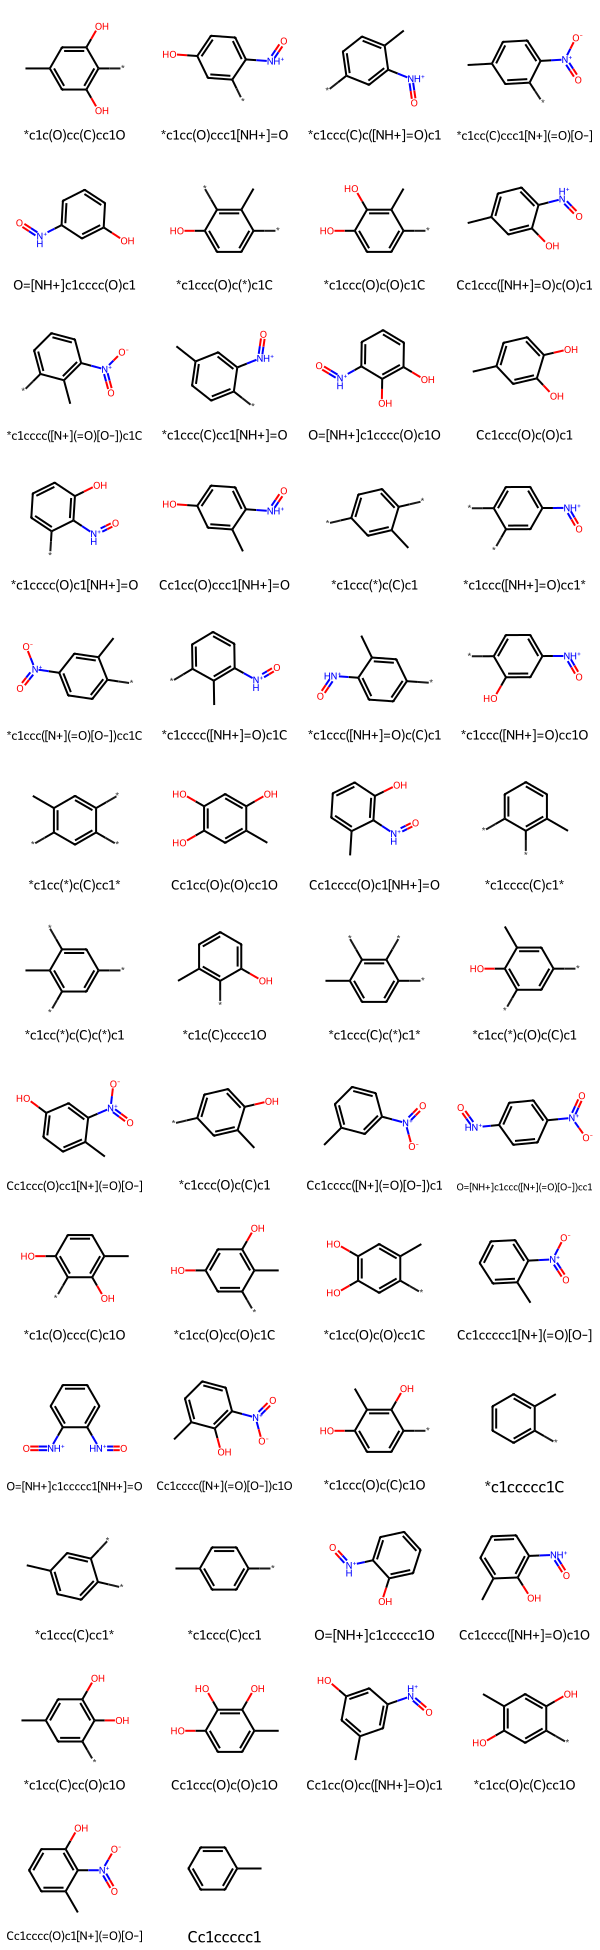

In [10]:
# Create Mol objects
smiles_list_1 = list(chemical_space_1)

mols = []

for smi in smiles_list_1:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])

#05.

In [27]:
chemical_space_1 = {'Cc1ccccc1'}  # Toluene

reacting_species = {'[OH]', '[N+](=O)[O-]', '[N=O]'}
num_iterations = 3

reaction_rules = [
    AllChem.ReactionFromSmarts('[cH:1]>>[c:1][*]'),  # Radical formation
    AllChem.ReactionFromSmarts('[c:1]>>[c:1]O'),
    AllChem.ReactionFromSmarts('[c:1][O]>>[c:1][N+](=O)[O-]'),
    AllChem.ReactionFromSmarts('[c:1][*]>>[c:1][N](=O)')
]

# Reaction
for _ in range(num_iterations):
    temp_new_products = set()

    for reactant_smiles in chemical_space_1.copy():
        reactant_mol = Chem.MolFromSmiles(reactant_smiles)

        if reactant_mol:
            for rxn in reaction_rules:
                possible_products = rxn.RunReactants((reactant_mol,))

                for prod_set in possible_products:
                    for prod in prod_set:
                        try:
                            prod.UpdatePropertyCache(strict=False)
                            Chem.SanitizeMol(prod, Chem.SanitizeFlags.SANITIZE_SETAROMATICITY)

                            prod_smiles = Chem.MolToSmiles(prod)

                            # radicals propagate
                            if "[c*]" in prod_smiles:
                                prod_smiles = prod_smiles.replace("[c*]", "[c]")

                            if prod_smiles not in chemical_space_1:
                                temp_new_products.add(prod_smiles)
                        except:
                            pass

    chemical_space_1.update(temp_new_products)


print("Generated Chemical Space:")
for chem in chemical_space_1:
    print(chem)

Generated Chemical Space:
*c(N=O)c(*)c(C)cc
*c1c(O)cc(C)cc1O
*c(cc(*)cc)N=O
*c(ccc)c(O)N=O
*cccc(*)c(C)N=O
Cc1(O)c(O)cccc1O
cc(ccc(C)N=O)N=O
*c1cc(C)ccc1[N+](=O)[O-]
cc(C)cc(O)c(O)N=O
*c1(O)cccc(C)c1
Cc(cN=O)cc(O)cO
*c(cC)cc(O)cN=O
*c1cccc(C)c1(*)O
*c1ccc(O)c(*)c1C
O=Nc1ccc(O)cc1
*c1ccc(O)c(O)c1C
*c1ccc(C)cc1(*)O
O=Nc1(O)cccc(O)c1
ccc(C)c(cN=O)N=O
*ccc(O)ccN=O
Cc(cN=O)cccO
Cc1ccccc1(O)O
*c(cN=O)c(O)c(c)C
*c1cccc([N+](=O)[O-])c1C
*c(ccN=O)ccN=O
cc(cc(C)cN=O)[N+](=O)[O-]
*c1cccc(C)(O)c1*
*c(N=O)c(O)ccc
*c(cN=O)c(C)ccO
ccccc(N=O)N=O
ccc(C)ccN=O
ccc(O)c(C)c(O)N=O
*c(cc(O)c(c)C)N=O
Cc(ccO)ccN=O
*c1cc(*)cc(N=O)c1
O=Nccc(ccO)N=O
*c1ccc(*)c(C)(O)c1
cccc(O)c(C)N=O
Cc1ccc(O)c(O)c1
cc(O)c(O)cc(C)N=O
ccc(C)c(O)c(O)N=O
*ccc(C)cc(*)N=O
*c(cc(C)c(*)c)N=O
cc(C)cc(O)cN=O
*ccccc(O)N=O
cc(C)c(ccN=O)N=O
*c1ccc(C)c(O)(O)c1
*cc(O)c(C)ccN=O
Ccccc(cN=O)[N+](=O)[O-]
*c1ccc(*)c(C)c1
*c1ccc([N+](=O)[O-])cc1C
*c(cN=O)cc(c)O
Cc1ccc(O)cc1(O)O
Cc1ccc(O)cc1N=O
*c(cO)cc(C)cN=O
cccc(C)c(N=O)N=O
*c(c)cc(cN=O)N=O
*c(cc)c

[00:47:46] non-ring atom 0 marked aromatic
[00:47:46] non-ring atom 0 marked aromatic
[00:47:46] non-ring atom 0 marked aromatic
[00:47:46] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[00:47:46] non-ring atom 1 marked aromatic
[00:47:46] non-ring atom 0 marked aromatic
[00:47:46] non-ring atom 0 marked aromatic
[00:47:46] non-ring atom 1 marked aromatic
[00:47:46] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[00:47:46] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[00:47:46] non-ring atom 0 marked aromatic
[00:47:46] non-ring atom 1 marked aromatic
[00:47:46] non-ring atom 0 marked aromatic
[00:47:46] non-ring atom 1 marked aromatic
[00:47:46] non-ring atom 0 marked aromatic
[00:47:46] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:47:46] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:47:46] non-ring atom 0 marked aromatic
[00:47:46] non-ring atom 0 marked aromatic
[00:47:46] non-ring atom 1 marked aromatic
[00:47:46] non-ring atom 1 marked aromatic
[00:47:

[00:47:57] non-ring atom 1 marked aromatic
[00:47:57] non-ring atom 1 marked aromatic
[00:47:57] non-ring atom 1 marked aromatic
[00:47:57] non-ring atom 1 marked aromatic
[00:47:57] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8
[00:47:57] non-ring atom 0 marked aromatic
[00:47:57] non-ring atom 0 marked aromatic
[00:47:57] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[00:47:57] non-ring atom 1 marked aromatic
[00:47:57] non-ring atom 1 marked aromatic
[00:47:57] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[00:47:57] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6
[00:47:57] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 9
[00:47:57] non-ring atom 0 marked aromatic
[00:47:57] non-ring atom 1 marked aromatic
[00:47:57] non-ring atom 1 marked aromatic
[00:47:57] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[00:47:57] non-ring atom 1 marked aromatic
[00:47:57] non-ring atom 1 marked aromatic
[00:47:57] non-ring atom 0 marked aromatic
[00:47:57] Can't kekulize mol.  

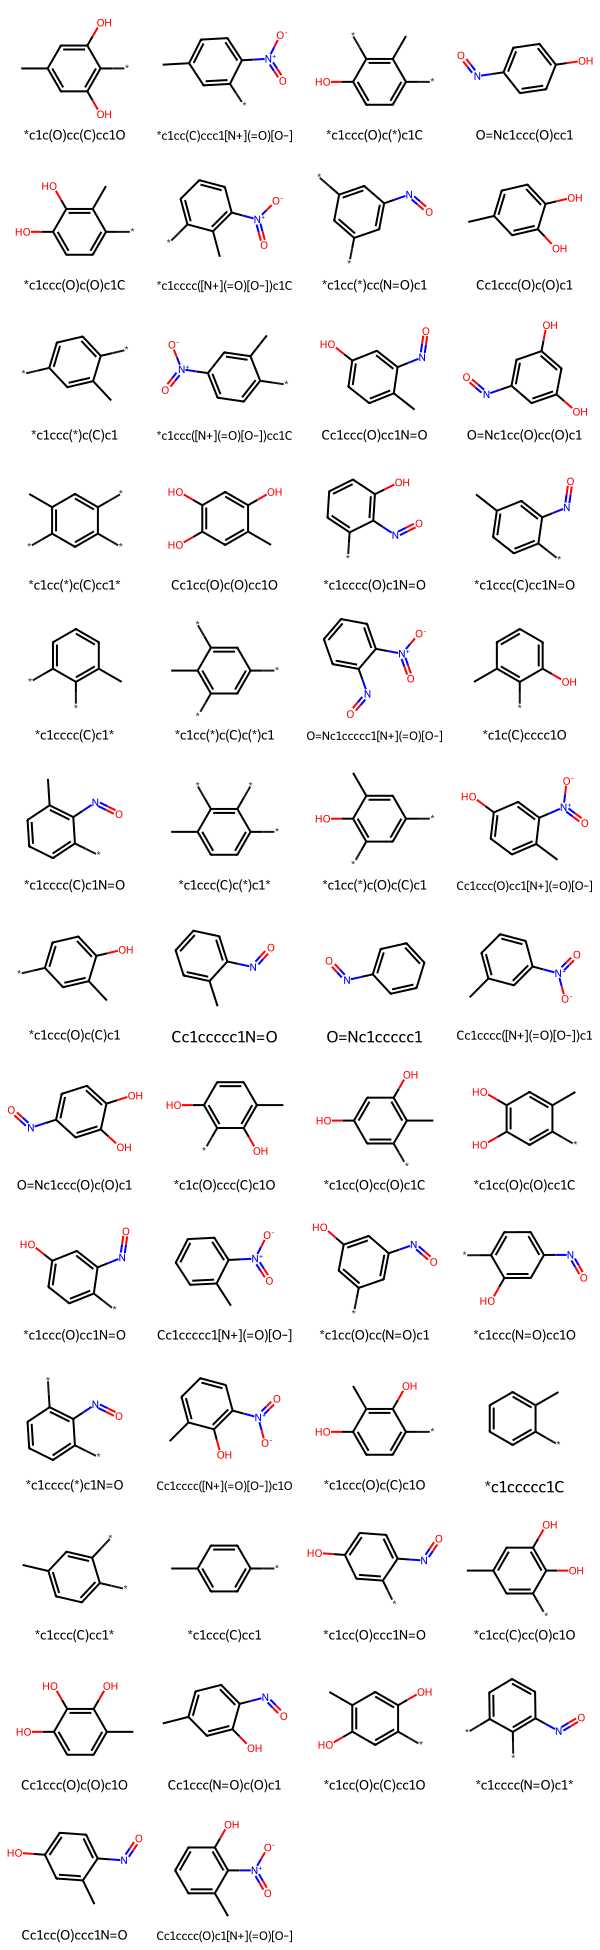

In [28]:
# Create Mol objects
smiles_list_1 = list(chemical_space_1)

mols = []

for smi in smiles_list_1:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])

#06. nitro/ nitroso

In [29]:
chemical_space_1 = {'Cc1ccccc1'}  # Toluene

reacting_species = {'[OH]', '[N;D3](=[O;D1])[O;D1]', '[N;R0]=[O;D1]'}
num_iterations = 3


reaction_rules = [
    AllChem.ReactionFromSmarts('[cH:1]>>[c:1][*]'),  # Radical formation
    AllChem.ReactionFromSmarts('[c:1]>>[c:1][OH]'),
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1][N;D3](=[O;D1])[O;D1]'),  # NO₂
    AllChem.ReactionFromSmarts('[c:1][*]>>[c:1][N;R0]=[O;D1]'),   # NO
]

# Reaction
for _ in range(num_iterations):
    temp_new_products = set()

    for reactant_smiles in chemical_space_1.copy():
        reactant_mol = Chem.MolFromSmiles(reactant_smiles)

        if reactant_mol:
            for rxn in reaction_rules:
                possible_products = rxn.RunReactants((reactant_mol,))

                for prod_set in possible_products:
                    for prod in prod_set:
                        try:
                            prod.UpdatePropertyCache(strict=False)
                            Chem.SanitizeMol(prod, Chem.SanitizeFlags.SANITIZE_SETAROMATICITY)

                            prod_smiles = Chem.MolToSmiles(prod)

                            # radicals propagate
                            if "[c*]" in prod_smiles:
                                prod_smiles = prod_smiles.replace("[c*]", "[c]")

                            if prod_smiles not in chemical_space_1:
                                temp_new_products.add(prod_smiles)
                        except:
                            pass

    chemical_space_1.update(temp_new_products)


print("Generated Chemical Space:")
for chem in chemical_space_1:
    print(chem)


Generated Chemical Space:
*c(N=O)c(*)c(C)cc
*c1c(O)cc(C)cc1O
*c(cc(*)cc)N=O
*c(ccc)c(O)N=O
*cccc(*)c(C)N=O
Cc1(O)c(O)cccc1O
cc(ccc(C)N=O)N=O
cc(C)cc(O)c(O)N=O
*c1(O)cccc(C)c1
Cc(cN=O)cc(O)cO
*c(cC)cc(O)cN=O
*c1cccc(C)c1(*)O
*c1ccc(O)c(*)c1C
O=Nc1ccc(O)cc1
*c1ccc(O)c(O)c1C
*c1ccc(C)cc1(*)O
O=Nc1(O)cccc(O)c1
ccc(C)c(cN=O)N=O
*ccc(O)ccN=O
Cc(cN=O)cccO
Cc1ccccc1(O)O
*c(cN=O)c(O)c(c)C
*c(ccN=O)ccN=O
*c1cccc(C)(O)c1*
*c(N=O)c(O)ccc
*c(cN=O)c(C)ccO
ccccc(N=O)N=O
ccc(C)ccN=O
ccc(O)c(C)c(O)N=O
*c(cc(O)c(c)C)N=O
Cc(ccO)ccN=O
*c1cc(*)cc(N=O)c1
O=Nccc(ccO)N=O
*c1ccc(*)c(C)(O)c1
cccc(O)c(C)N=O
Cc1ccc(O)c(O)c1
cc(O)c(O)cc(C)N=O
Cc1ccc(O)c(N(=O)O)c1
Cc1ccc(N(=O)O)cc1O
ccc(C)c(O)c(O)N=O
*ccc(C)cc(*)N=O
*c(cc(C)c(*)c)N=O
cc(C)cc(O)cN=O
*ccccc(O)N=O
cc(C)c(ccN=O)N=O
*c1ccc(C)c(O)(O)c1
*cc(O)c(C)ccN=O
*c1ccc(*)c(C)c1
*c(cN=O)cc(c)O
Cc1ccc(O)cc1(O)O
Cc1ccc(O)cc1N=O
*c(cO)cc(C)cN=O
cccc(C)c(N=O)N=O
*c(c)cc(cN=O)N=O
*c(cc)c(cN=O)N=O
*c(c)cc(O)cN=O
*c(cc)ccN=O
*c1ccc(C)(O)cc1*
O=Nc1cc(O)cc(O)c1
*c1cc(*)c(C)c

[01:00:29] non-ring atom 0 marked aromatic
[01:00:29] non-ring atom 0 marked aromatic
[01:00:29] non-ring atom 0 marked aromatic
[01:00:29] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:00:29] non-ring atom 1 marked aromatic
[01:00:29] non-ring atom 0 marked aromatic
[01:00:29] non-ring atom 0 marked aromatic
[01:00:29] non-ring atom 1 marked aromatic
[01:00:29] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[01:00:29] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:00:29] non-ring atom 0 marked aromatic
[01:00:29] non-ring atom 1 marked aromatic
[01:00:29] non-ring atom 0 marked aromatic
[01:00:29] non-ring atom 1 marked aromatic
[01:00:29] non-ring atom 0 marked aromatic
[01:00:29] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:00:29] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:00:29] non-ring atom 0 marked aromatic
[01:00:29] Explicit valence for atom # 5 N, 4, is greater than permitted
[01:00:29] non-ring atom 0 marked aromatic
[01:00:29] non-ring 

[01:00:36] non-ring atom 1 marked aromatic
[01:00:36] non-ring atom 1 marked aromatic
[01:00:36] non-ring atom 1 marked aromatic
[01:00:36] non-ring atom 1 marked aromatic
[01:00:36] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8
[01:00:36] non-ring atom 0 marked aromatic
[01:00:36] non-ring atom 0 marked aromatic
[01:00:36] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:00:36] non-ring atom 1 marked aromatic
[01:00:36] non-ring atom 1 marked aromatic
[01:00:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:00:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6
[01:00:36] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 9
[01:00:36] non-ring atom 0 marked aromatic
[01:00:36] non-ring atom 1 marked aromatic
[01:00:36] non-ring atom 1 marked aromatic
[01:00:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:00:36] non-ring atom 1 marked aromatic
[01:00:36] non-ring atom 1 marked aromatic
[01:00:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[01:00:36] non

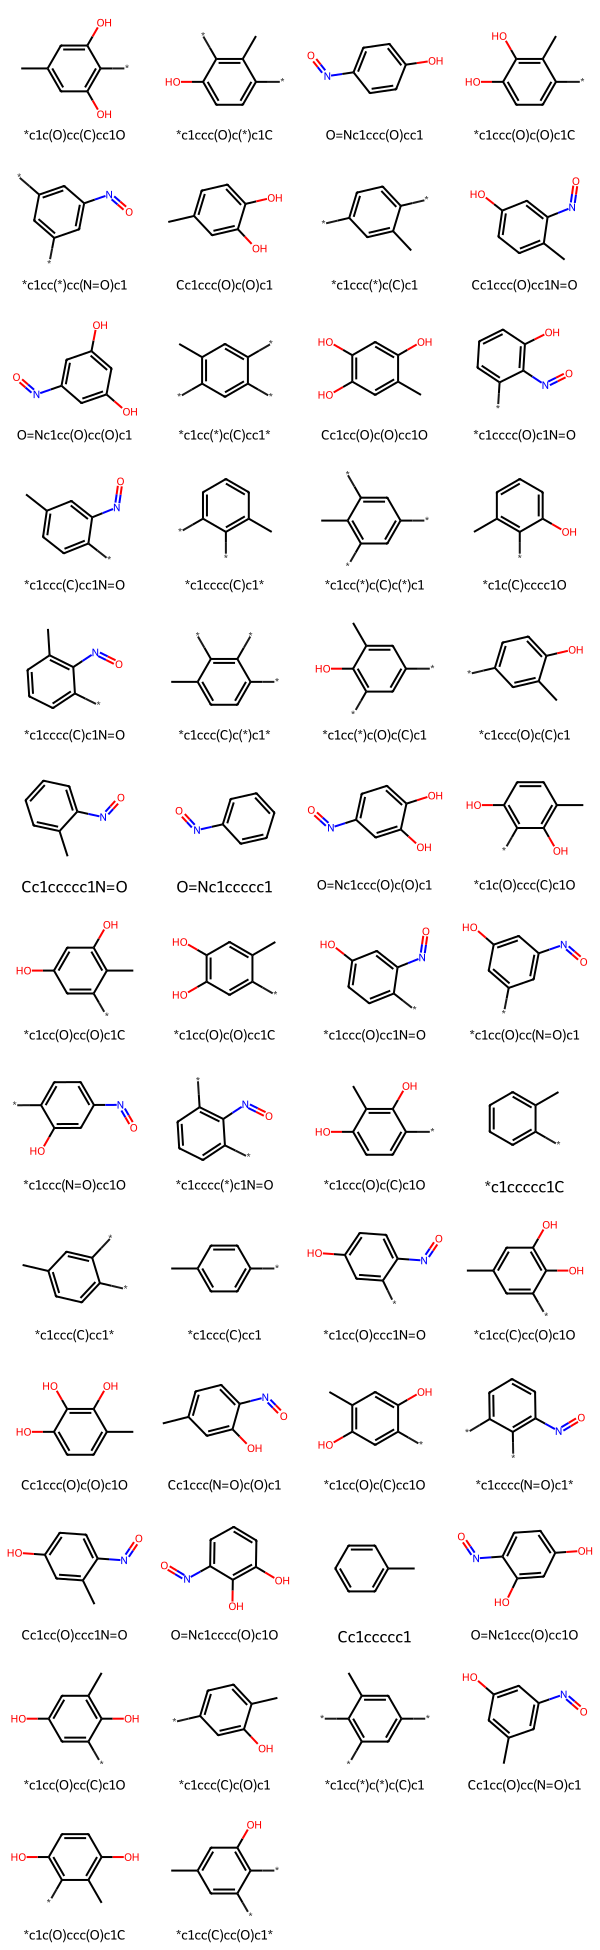

In [30]:
# Create Mol objects
smiles_list_1 = list(chemical_space_1)

mols = []

for smi in smiles_list_1:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])

#07. Nitro.Aromatic

In [31]:
chemical_space_1 = {'Cc1ccccc1'}  # Toluene

reacting_species = {'[OH]', '[N;H0;$(N-c);D3](=[O;D1])~[O;D1]', '[N;H0;$(N-c);D3]=[O;D1]'}
num_iterations = 3


reaction_rules = [
    AllChem.ReactionFromSmarts('[cH:1]>>[c:1][*]'),  # Radical formation
    AllChem.ReactionFromSmarts('[c:1]>>[c:1][OH]'),
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1][N;H0;$(N-c);D3](=[O;D1])~[O;D1]'),  # NO₂
    AllChem.ReactionFromSmarts('[c:1][*]>>[c:1][N;H0;$(N-c);D3]=[O;D1]'),   # NO

]

# Reaction
for _ in range(num_iterations):
    temp_new_products = set()

    for reactant_smiles in chemical_space_1.copy():
        reactant_mol = Chem.MolFromSmiles(reactant_smiles)

        if reactant_mol:
            for rxn in reaction_rules:
                possible_products = rxn.RunReactants((reactant_mol,))

                for prod_set in possible_products:
                    for prod in prod_set:
                        try:
                            prod.UpdatePropertyCache(strict=False)
                            Chem.SanitizeMol(prod, Chem.SanitizeFlags.SANITIZE_SETAROMATICITY)

                            prod_smiles = Chem.MolToSmiles(prod)

                            # radicals propagate
                            if "[c*]" in prod_smiles:
                                prod_smiles = prod_smiles.replace("[c*]", "[c]")

                            if prod_smiles not in chemical_space_1:
                                temp_new_products.add(prod_smiles)
                        except:
                            pass

    chemical_space_1.update(temp_new_products)


print("Generated Chemical Space:")
for chem in chemical_space_1:
    print(chem)


Generated Chemical Space:
*c(N=O)c(*)c(C)cc
*c1c(O)cc(C)cc1O
*c(cc(*)cc)N=O
*c(ccc)c(O)N=O
*cccc(*)c(C)N=O
Cc1(O)c(O)cccc1O
cc(ccc(C)N=O)N=O
O=Nc1ccc(N(=O)~O)cc1
cc(C)cc(O)c(O)N=O
*c1(O)cccc(C)c1
Cc(cN=O)cc(O)cO
*c(cC)cc(O)cN=O
*c1cccc(C)c1(*)O
*c1ccc(O)c(*)c1C
O=Nc1ccc(O)cc1
*c1ccc(O)c(O)c1C
*c1ccc(C)cc1(*)O
Cc1(O)cccc(N(=O)~O)c1
O=Nc1(O)cccc(O)c1
ccc(C)c(cN=O)N=O
*ccc(O)ccN=O
ccccc(N=O)N(=O)~O
Cc(cN=O)cccO
Cc1ccccc1(O)O
*c(cN=O)c(O)c(c)C
*c1cccc(C)c1N(=O)~O
*c(ccN=O)ccN=O
*c1cccc(C)(O)c1*
*c(N=O)c(O)ccc
*c(cN=O)c(C)ccO
ccccc(N=O)N=O
ccc(C)ccN=O
ccc(C)cc(N=O)N(=O)~O
ccc(O)c(C)c(O)N=O
*c(cc(O)c(c)C)N=O
Cc(ccO)ccN=O
Cc1ccc(N(=O)~O)c(O)c1
*c1cc(*)cc(N=O)c1
O=Nccc(ccO)N=O
Cc1ccc(O)cc1N(=O)~O
*c1ccc(*)c(C)(O)c1
cccc(O)c(C)N=O
Cc1ccc(O)(N(=O)~O)cc1
Cc1ccc(O)c(O)c1
cc(O)c(O)cc(C)N=O
ccc(C)c(O)c(O)N=O
*ccc(C)cc(*)N=O
*c(cc(C)c(*)c)N=O
cc(C)cc(O)cN=O
*ccccc(O)N=O
cc(C)c(ccN=O)N=O
*c1ccc(C)c(O)(O)c1
*cc(O)c(C)ccN=O
Cc1cc(N(=O)~O)ccc1O
*c1ccc(C)c(N(=O)~O)c1
Ccc(cccN=O)N(=O)~O
*c1ccc(*)c(C)c1
cc(

[01:01:25] non-ring atom 0 marked aromatic
[01:01:25] non-ring atom 0 marked aromatic
[01:01:25] non-ring atom 0 marked aromatic
[01:01:25] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:01:25] non-ring atom 1 marked aromatic
[01:01:25] non-ring atom 0 marked aromatic
[01:01:25] non-ring atom 0 marked aromatic
[01:01:25] non-ring atom 1 marked aromatic
[01:01:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[01:01:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:01:25] non-ring atom 0 marked aromatic
[01:01:25] non-ring atom 1 marked aromatic
[01:01:25] non-ring atom 0 marked aromatic
[01:01:25] non-ring atom 1 marked aromatic
[01:01:25] non-ring atom 0 marked aromatic
[01:01:25] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:01:25] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:01:25] non-ring atom 0 marked aromatic
[01:01:25] non-ring atom 0 marked aromatic
[01:01:25] non-ring atom 1 marked aromatic
[01:01:25] non-ring atom 1 marked aromatic
[01:01:

[01:01:35] non-ring atom 1 marked aromatic
[01:01:35] non-ring atom 1 marked aromatic
[01:01:35] non-ring atom 1 marked aromatic
[01:01:35] non-ring atom 1 marked aromatic
[01:01:35] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8
[01:01:35] non-ring atom 0 marked aromatic
[01:01:35] non-ring atom 0 marked aromatic
[01:01:35] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:01:35] non-ring atom 1 marked aromatic
[01:01:35] non-ring atom 1 marked aromatic
[01:01:35] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:01:35] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6
[01:01:35] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 10
[01:01:35] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 9
[01:01:35] non-ring atom 0 marked aromatic
[01:01:35] non-ring atom 1 marked aromatic
[01:01:35] non-ring atom 0 marked aromatic
[01:01:35] non-ring atom 1 marked aromatic
[01:01:35] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:01:35] non-ring atom 1 marked aromatic
[01:01:35] no

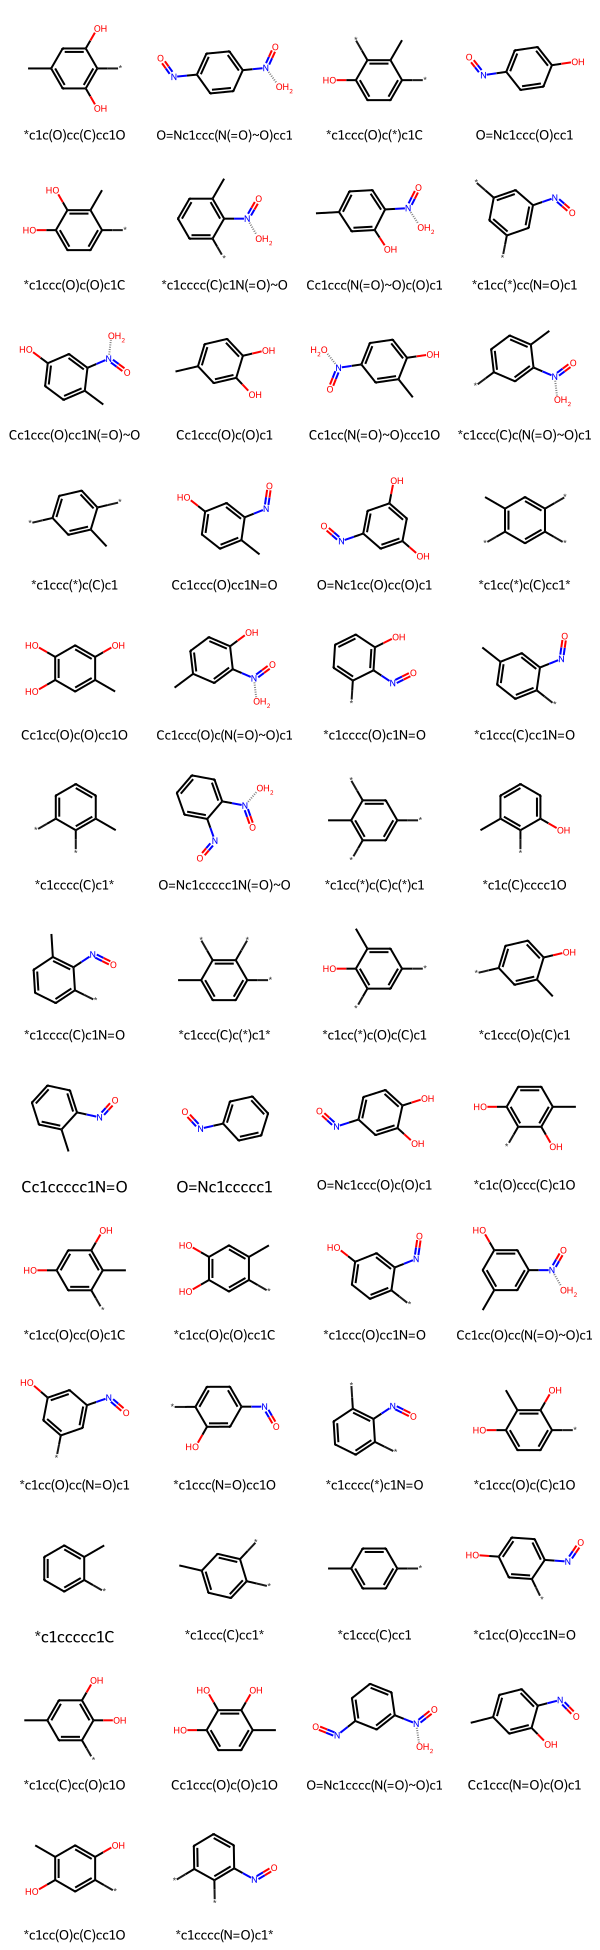

In [32]:
# Create Mol objects
smiles_list_1 = list(chemical_space_1)

mols = []

for smi in smiles_list_1:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])

#08. Nitro.Aromatic

In [33]:
chemical_space_1 = {'Cc1ccccc1'}  # Toluene
reacting_species = {'[OH]','[N;H0;$(N-c);D3](=[O;D1])~[O;D1]', '[N;H0;$(N-c);D3]=[O;D1]'}
num_iterations = 3

reaction_rules = [
    AllChem.ReactionFromSmarts('[cH:1]>>[c:1][*]'),  # Radical formation
    AllChem.ReactionFromSmarts('[c:1][*]>>[c:1][OH]'),
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1][N;H0;$(N-c);D3](=[O;D1])~[O;D1]'),  # NO₂
    AllChem.ReactionFromSmarts('[c:1][*]>>[c:1][N;H0;$(N-c);D3]=[O;D1]'),  # NO

]

# Reactions
for _ in range(num_iterations):
    temp_new_products = set()

    for reactant_smiles in chemical_space_1.copy():
        reactant_mol = Chem.MolFromSmiles(reactant_smiles)
        if not reactant_mol:
            continue

        for rxn in reaction_rules:
            possible_products = rxn.RunReactants((reactant_mol,))
            for prod_set in possible_products:
                for prod in prod_set:
                    prod_smiles = Chem.MolToSmiles(prod)
                    if prod_smiles and "C" in prod_smiles and "c" in prod_smiles:
                        temp_new_products.add(prod_smiles)


    chemical_space_1.update(temp_new_products)


print("Generated Chemical Space:")
for chem in chemical_space_1:
    print(chem)

Generated Chemical Space:
ccc(C)c(O)cO
*c(N=O)c(*)c(C)cc
*c1cccc(C)c1
Ccccc(O)cN=O
*c1cc(C)cc(O)c1
*cccc(*)c(C)N=O
cc(ccc(C)N=O)N=O
*c(cc)cc(C)O
*ccc(*)c(C)cO
*cc(C)c(*)ccO
*c1cc(N=O)ccc1C
cccc(N=O)c(C)O
ccc(C)c(cN=O)N=O
Ccc(cccN=O)N=O
*c(c)ccc(C)O
Cc(cN=O)cccO
ccc(O)cc(C)N=O
ccc(C)ccN=O
Cc(ccO)ccN=O
*cc(C)ccc(*)O
*c1ccc(C)c(*)c1
*c(c)c(C)ccO
cc(C)cccO
*c(cC)c(*)ccO
*c(O)c(*)cc(c)C
cccc(O)c(C)N=O
*c(cc(*)c(c)C)N=O
*c(O)c(*)cccC
*ccc(C)cc(*)N=O
*c(cc)c(*)c(C)N=O
cc(C)cc(O)cN=O
*c(cc(C)c(*)c)N=O
cccc(C)c(O)O
cccc(N=O)c(C)N=O
cc(C)c(ccN=O)N=O
*c1ccc(*)c(C)c1
*c(ccO)c(c)C
*cccc(C)cO
*cc(C)cccN=O
*cc(C)cc(*)cO
*cc(*)cc(C)cN=O
cccc(C)c(N=O)N=O
*c1cccc(O)c1C
ccc(N=O)c(C)cN=O
*c1cc(*)c(C)cc1*
Cc1ccccc1O
*c(c)cc(*)c(C)N=O
*ccc(C)ccO
*cc(*)c(C)ccO
cc(C)c(O)ccO
*cccc(*)c(C)O
*c1ccc(C)cc1N=O
*c1cccc(C)c1*
*c(ccccC)N=O
*c1cc(*)c(C)c(*)c1
*cc(C)c(*)ccN=O
Cccc(ccN=O)N=O
cc(cc(C)cO)N=O
*c1c(C)cccc1O
cc(ccc(C)O)N=O
Cc1cccc(N=O)c1
*c1cccc(C)c1N=O
*c1ccc(C)c(*)c1*
Cc(cN=O)cccN=O
*c(O)c(C)ccc
cc(C)cc(cO)N

[01:02:15] non-ring atom 0 marked aromatic
[01:02:15] non-ring atom 0 marked aromatic
[01:02:15] non-ring atom 0 marked aromatic
[01:02:15] non-ring atom 0 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 0 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 0 marked aromatic
[01:02:15] non-ring atom 0 marked aromatic
[01:02:15] non-ring atom 0 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 0 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 0 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] non-ring atom 1 marked aromatic
[01:02:15] 

[01:02:22] non-ring atom 0 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 0 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 0 marked aromatic
[01:02:22] non-ring atom 0 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 0 marked aromatic
[01:02:22] non-ring atom 0 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 0 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] non-ring atom 0 marked aromatic
[01:02:22] non-ring atom 1 marked aromatic
[01:02:22] 

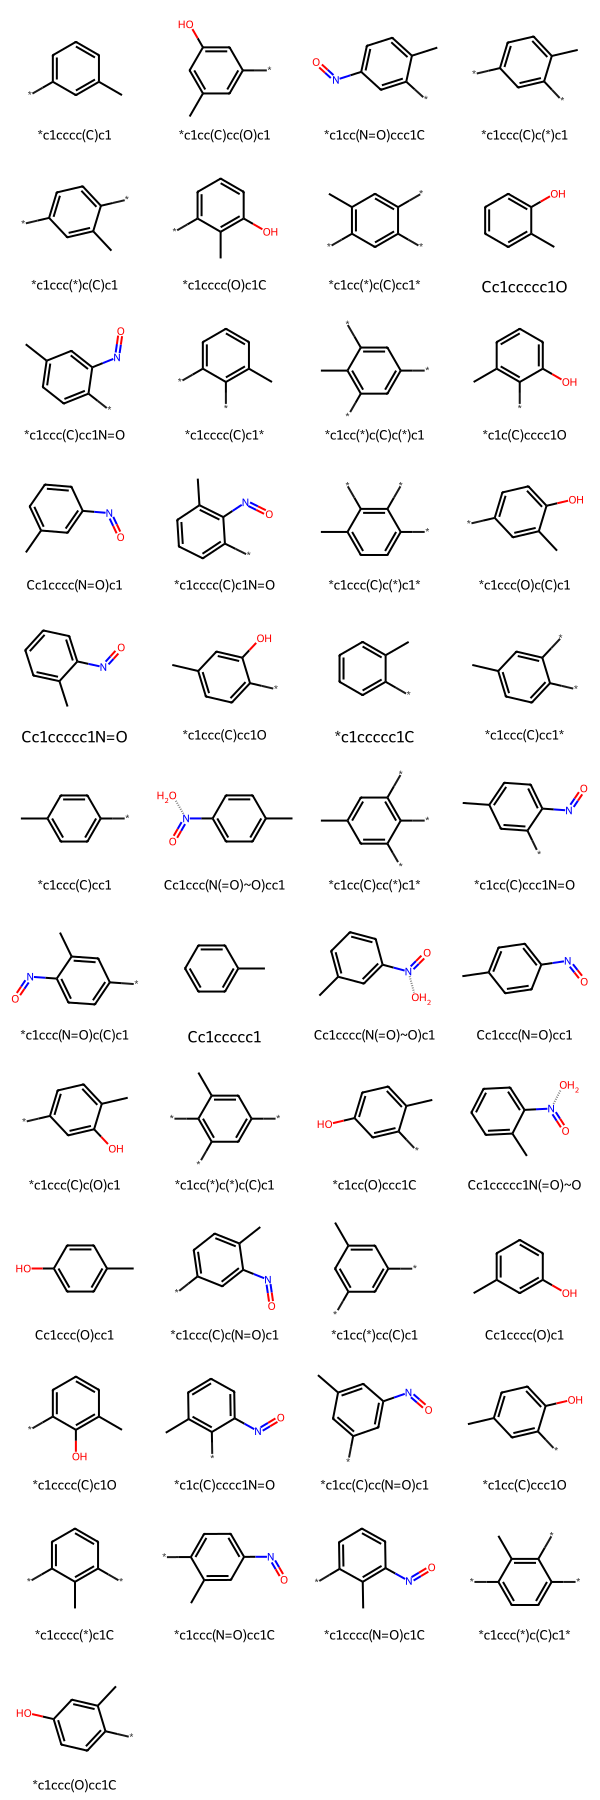

In [34]:
# Create Mol objects
smiles_list_1 = list(chemical_space_1)

mols = []

for smi in smiles_list_1:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])

#09.

In [ ]:
chemical_space_1 = {'Cc1ccccc1'}  # Toluene
reacting_species = {'[OH]','[N+](=O)[O-]', '[N]=O'}
num_iterations = 3

reaction_rules = [
    AllChem.ReactionFromSmarts('[c:1]>>[c:1][*]'),  # Radical formation
    AllChem.ReactionFromSmarts('[c:1][*]>>[c:1][OH]'),
    AllChem.ReactionFromSmarts('[c:1][*]>>[c:1][N+]([O-])=O'),
    AllChem.ReactionFromSmarts('[c:1][*]>>[c:1][N]=O')
]

# Reactions
for _ in range(num_iterations):
    temp_new_products = set()

    for reactant_smiles in chemical_space_1.copy():
        reactant_mol = Chem.MolFromSmiles(reactant_smiles)
        if not reactant_mol:
            continue

        for rxn in reaction_rules:
            possible_products = rxn.RunReactants((reactant_mol,))
            for prod_set in possible_products:
                for prod in prod_set:
                    prod_smiles = Chem.MolToSmiles(prod)
                    if prod_smiles and "c" in prod_smiles:
                        temp_new_products.add(prod_smiles)

    chemical_space_1.update(temp_new_products)

print("Generated Chemical Space:")
for chem in chemical_space_1:
    print(chem)

[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 0 marked ar

Generated Chemical Space:
*c(ccO)c(c)C
*c(c)c(*)ccN=O
*c(cc)c(cO)N=O
*c1ccc(C)cc1*
*c(cc[N+](=O)[O-])c(c)C
*c(O)ccccO
O=[N+]([O-])c1ccccc1[N+](=O)[O-]
*c(c)cc(C)cO
*c1ccc(*)c([N+](=O)[O-])c1
*c(ccccC)[N+](=O)[O-]
*c(c[N+](=O)[O-])c(O)cc
*c1cccc(C)c1N=O
*c(c[N+](=O)[O-])ccc
*c(cc)c(c[N+](=O)[O-])N=O
*c(c[N+](=O)[O-])cc(c)O
*c1ccc(N=O)c(C)c1
cccc(O)c(C)O
*c(N=O)c(ccc)[N+](=O)[O-]
*c1cccc(*)c1C
*c1([N+](=O)[O-])ccccc1C
*c(cc)cc(O)O
*cc(*)ccc[N+](=O)[O-]
*c(ccc)c(C)O
*c(ccO)c(c)[N+](=O)[O-]
ccc(C)c(c[N+](=O)[O-])[N+](=O)[O-]
*cc(*)cccN=O
*ccccc[N+](=O)[O-]
O=[N+]([O-])c1cccc([N+](=O)[O-])c1
*c1(C)ccccc1N=O
cc(N=O)c(C)cc[N+](=O)[O-]
*c(ccc(c)N=O)N=O
*c1(*)ccc(O)cc1
*ccccc(*)[N+](=O)[O-]
*cc(C)c(*)ccN=O
O=[N+]([O-])c1ccc([N+](=O)[O-])cc1
*c(cO)cc(c)O
*ccc(*)ccN=O
*c(c)c(O)ccO
*c1cc(*)cc(N=O)c1
*c(ccc)c(O)O
ccc(C)c(O)cO
*c1(*)ccccc1C
*c(c[N+](=O)[O-])cc(c)C
*c(O)cc(*)cc
cc(O)c(C)ccO
*c1cccc(*)([N+](=O)[O-])c1
Ccc(cccO)[N+](=O)[O-]
Cc(ccccN=O)[N+](=O)[O-]
cccc(c(C)O)[N+](=O)[O-]
Ccccc(O)cO
*cc

[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-ring atom 0 marked aromatic
[08:47:43] non-ring atom 1 marked aromatic
[08:47:43] non-rin

[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 0 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 0 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] non-ring atom 1 marked aromatic
[08:47:51] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[08:47:51] non-rin

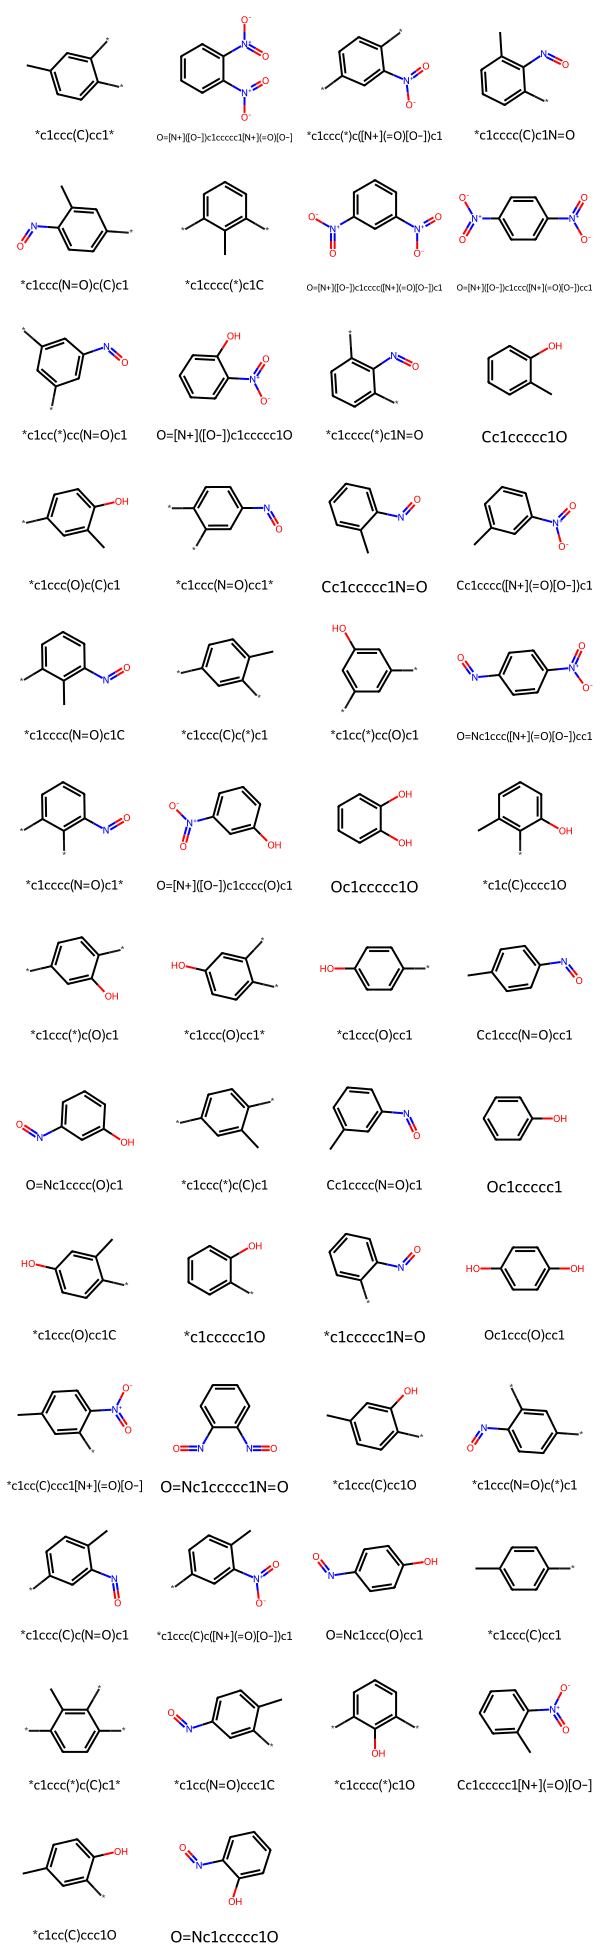

In [ ]:
# Create Mol objects
smiles_list_1 = list(chemical_space_1)

mols = []

for smi in smiles_list_1:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])